## Basic EDA and missingness investigation

In here, I'm just importing the 'training' dataset for the Ames, Iowa housing market and taking a look at what is missing and some basic modelling or visualizations.

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
train_filepath = "../data/train.csv"

In [3]:
ames_df = pd.read_csv(train_filepath)

In [4]:
print(ames_df.shape)

(1460, 81)


In [5]:
ames_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
ames_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

We can see from here, variables like `FireplaceQu`, `PoolQC`, `Fence`, `MiscFeature`, `Alley`, and misc basement related variables do not have the full 1460 observations as seen in the other features. For these, I believe we can impute a 0, as the most likely scenario for not having any value for a fireplace or pool is that there is no pool to begin with.

In [8]:
ames_df.isna().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [9]:
null_data = ames_df[ames_df.isna().any(axis=1)]
null_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
ames = ames_df.fillna(0)

In [12]:
set(ames.FireplaceQu)

{0, 'Ex', 'Fa', 'Gd', 'Po', 'TA'}

In [13]:
print("There are {} amount of NaNs in the original dataframe".format(ames_df.isna().sum().sum()))
print("There are {} amount of NaNs in the copied/imputed dataframe".format(ames.isna().sum().sum()))

There are 6965 amount of NaNs in the original dataframe
There are 0 amount of NaNs in the copied/imputed dataframe


In [14]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non

There are a lot of columns that are of `string` or `object` type, that would be pretty important features I think, such as `GarageFinish`, `Utilities`, or `KitchenQual` for example:

In [15]:
print(set(ames.GarageFinish))
print(set(ames.KitchenQual))

{'Unf', 0, 'Fin', 'RFn'}
{'Ex', 'Fa', 'Gd', 'TA'}


Because of that, I am going to use the `pd.get_dummies` function used in the `PML_1` lecture to assign them 0s or 1s in another set of columns. This will create a lot of features, but I think it will be easiest to work with lots of columns and trim down, rather than working harder to manuall assign every column that is an object, an arbitrary `0` or one. As an example:

        >>> print(set(ames.KitchenQual))
        {'Gd', 'Ex', 'TA', 'Fa'}
        
It doesn't make sense to assign the list `[0, 1, 2, 3]` to that variable set, since `3` over `2` doesn't make sense unless you read descriptions for every single feature and what the numbers mean. 

In [16]:
ames.columns.to_series().groupby(ames.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object'),
 dtype('O'): Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 

In [17]:
df = ames.copy()

### I'm going to be doing the following for a lot of variables, sorry but this isn't going to be very readable..

In [18]:
MSZoning = pd.get_dummies(df['MSZoning'], prefix='MSZoning', prefix_sep='_')
MSZoning = MSZoning.drop('MSZoning_C (all)', axis=1) # dropping the first column since
                                                     # having all of them is redundant

MSZoning.describe()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.044521,0.010959,0.788356,0.149315
std,0.206319,0.104145,0.408614,0.356521
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [19]:
Street = pd.get_dummies(df['Street'], prefix='Street', prefix_sep='_')
Street = Street.drop('Street_Grvl', axis=1) # dropping the first column since
                                                     # having all of them is redundant
Street.describe()

,Street_Pave
count,1460.000000
mean,0.995890
std,0.063996
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [20]:
Alley = pd.get_dummies(df['Alley'], prefix='Alley', prefix_sep='_')
Alley = Alley.drop('Alley_0', axis=1) # dropping the first column since
                                       # having all of them is redundant
Alley.describe()

,Alley_Grvl,Alley_Pave
count,1460.000000,1460.000000
mean,0.034247,0.028082
std,0.181924,0.165264
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [21]:
LotShape = pd.get_dummies(df['LotShape'], prefix='LotShape', prefix_sep='_')
LotShape = LotShape.drop('LotShape_Reg', axis=1) # dropping the first column since
                                                 # having all of them is redundant
LotShape.describe()

,LotShape_IR1,LotShape_IR2,LotShape_IR3
count,1460.000000,1460.000000,1460.000000
mean,0.331507,0.028082,0.006849
std,0.470916,0.165264,0.082505
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [22]:
LandContour = pd.get_dummies(df['LandContour'], prefix='LandContour', prefix_sep='_')
LandContour = LandContour.drop('LandContour_Lvl', axis=1) # dropping a column since
                                                         # having all of them is redundant
LandContour.describe()

,LandContour_Bnk,LandContour_HLS,LandContour_Low
count,1460.000000,1460.000000,1460.000000
mean,0.043151,0.034247,0.024658
std,0.203266,0.181924,0.155132
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [23]:
Utilities = pd.get_dummies(df['Utilities'], prefix='Utilities', prefix_sep='_')
Utilities = Utilities.drop('Utilities_NoSeWa', axis=1) # dropping a column since
                                                         # having all of them is redundant
Utilities.describe()

,Utilities_AllPub
count,1460.000000
mean,0.999315
std,0.026171
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [24]:
LandSlope = pd.get_dummies(df['LandSlope'], prefix='LandSlope', prefix_sep='_')
LandSlope = LandSlope.drop('LandSlope_Gtl', axis=1) # dropping a column since
                                                    # having all of them is redundant
LandSlope.describe()

,LandSlope_Mod,LandSlope_Sev
count,1460.000000,1460.000000
mean,0.044521,0.008904
std,0.206319,0.093973
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [25]:
LotConfig = pd.get_dummies(df['LotConfig'], prefix='LotConfig', prefix_sep='_')
LotConfig = LotConfig.drop('LotConfig_Inside', axis=1) # dropping a column since
                                                         # having all of them is redundant
LotConfig.describe()

,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.180137,0.064384,0.032192,0.002740
std,0.384433,0.245519,0.176570,0.052289
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [26]:
Neighborhood = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood', prefix_sep='_')
Neighborhood = Neighborhood.drop('Neighborhood_Blmngtn', axis=1) # dropping a column since
                                                                 # having all of them is redundant
Neighborhood.describe()

,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.001370,0.010959,0.039726,0.019178,0.102740,0.034932,0.068493,0.054110,0.025342,0.011644,...,0.028082,0.05274,0.077397,0.017123,0.050685,0.040411,0.058904,0.017123,0.026027,0.007534
std,0.036999,0.104145,0.195382,0.137198,0.303723,0.183669,0.252677,0.226311,0.157217,0.107313,...,0.165264,0.22359,0.267312,0.129775,0.219429,0.196989,0.235526,0.129775,0.159271,0.086502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
Condition1 = pd.get_dummies(df['Condition1'], prefix='Condition1', prefix_sep='_')
Condition1 = Condition1.drop('Condition1_Norm', axis=1) # dropping a column since
                                                        # having all of them is redundant
Condition1.describe()

,Condition1_Artery,Condition1_Feedr,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.032877,0.055479,0.005479,0.013014,0.007534,0.017808,0.001370,0.003425
std,0.178375,0.228992,0.073846,0.113372,0.086502,0.132299,0.036999,0.058440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
Condition2 = pd.get_dummies(df['Condition2'], prefix='Condition2', prefix_sep='_')
Condition2 = Condition2.drop('Condition2_Norm', axis=1) # dropping a column since
                                                        # having all of them is redundant
Condition2.describe()

,Condition2_Artery,Condition2_Feedr,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.001370,0.004110,0.000685,0.001370,0.000685,0.000685,0.001370
std,0.036999,0.063996,0.026171,0.036999,0.026171,0.026171,0.036999
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
BldgType = pd.get_dummies(df['BldgType'], prefix='BldgType', prefix_sep='_')
BldgType = BldgType.drop('BldgType_1Fam', axis=1) # dropping a column since
                                                        # having all of them is redundant
BldgType.describe()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.021233,0.035616,0.029452,0.078082
std,0.144209,0.185395,0.169128,0.268393
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [30]:
HouseStyle = pd.get_dummies(df['HouseStyle'], prefix='HouseStyle', prefix_sep='_')
HouseStyle = HouseStyle.drop('HouseStyle_1Story', axis=1) # dropping a column since
                                                        # having all of them is redundant
HouseStyle.describe()

,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.105479,0.009589,0.005479,0.007534,0.304795,0.025342,0.044521
std,0.307275,0.097486,0.073846,0.086502,0.460478,0.157217,0.206319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
RoofStyle = pd.get_dummies(df['RoofStyle'], prefix='RoofStyle', prefix_sep='_')
RoofStyle = RoofStyle.drop('RoofStyle_Gable', axis=1) # dropping a column since
                                                        # having all of them is redundant
RoofStyle.describe()

,RoofStyle_Flat,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.008904,0.007534,0.195890,0.004795,0.001370
std,0.093973,0.086502,0.397021,0.069100,0.036999
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
RoofMatl = pd.get_dummies(df['RoofMatl'], prefix='RoofMatl', prefix_sep='_')
RoofMatl = RoofMatl.drop('RoofMatl_CompShg', axis=1) # dropping a column since
                                                        # having all of them is redundant
RoofMatl.describe()

,RoofMatl_ClyTile,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.000685,0.000685,0.000685,0.000685,0.007534,0.003425,0.004110
std,0.026171,0.026171,0.026171,0.026171,0.086502,0.058440,0.063996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
Exterior1st = pd.get_dummies(df['Exterior1st'], prefix='Exterior1st', prefix_sep='_')
Exterior1st = Exterior1st.drop('Exterior1st_VinylSd', axis=1) # dropping a column since
                                                        # having all of them is redundant
Exterior1st.describe()

,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_Wd Sdng,Exterior1st_WdShing
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.013699,0.000685,0.001370,0.034247,0.000685,0.041781,0.152055,0.000685,0.150685,0.073973,0.001370,0.017123,0.141096,0.017808
std,0.116277,0.026171,0.036999,0.181924,0.026171,0.200157,0.359197,0.026171,0.357864,0.261816,0.036999,0.129775,0.348240,0.132299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
Exterior2nd = pd.get_dummies(df['Exterior2nd'], prefix='Exterior2nd', prefix_sep='_')
Exterior2nd = Exterior2nd.drop('Exterior2nd_VinylSd', axis=1) # dropping a column since
                                                        # having all of them is redundant
Exterior2nd.describe()

,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.013699,0.002055,0.004795,0.017123,0.000685,0.041096,0.141781,0.006849,0.146575,0.000685,0.097260,0.003425,0.017808,0.134932,0.026027
std,0.116277,0.045299,0.069100,0.129775,0.026171,0.198580,0.348945,0.082505,0.353803,0.026171,0.296413,0.058440,0.132299,0.341767,0.159271
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [35]:
MasVnrType = pd.get_dummies(df['MasVnrType'], prefix='MasVnrType', prefix_sep='_')
MasVnrType = MasVnrType.drop('MasVnrType_None', axis=1) # dropping a column since
                                                        # having all of them is redundant
MasVnrType.describe()

,MasVnrType_0,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.005479,0.010274,0.304795,0.087671
std,0.073846,0.100873,0.460478,0.282913
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [36]:
ExterQual = pd.get_dummies(df['ExterQual'], prefix='ExterQual', prefix_sep='_')
ExterQual = ExterQual.drop('ExterQual_TA', axis=1) # dropping a column since
                                                        # having all of them is redundant
ExterQual.describe()

,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd
count,1460.000000,1460.000000,1460.000000
mean,0.035616,0.009589,0.334247
std,0.185395,0.097486,0.471888
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [37]:
ExterCond = pd.get_dummies(df['ExterCond'], prefix='ExterCond', prefix_sep='_')
ExterCond = ExterCond.drop('ExterCond_TA', axis=1) # dropping a column since
                                                        # having all of them is redundant
ExterCond.describe()

,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.002055,0.019178,0.100000,0.000685
std,0.045299,0.137198,0.300103,0.026171
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [38]:
Foundation = pd.get_dummies(df['Foundation'], prefix='Foundation', prefix_sep='_')
Foundation = Foundation.drop('Foundation_BrkTil', axis=1) # dropping a column since
                                                        # having all of them is redundant
Foundation.describe()

,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.434247,0.443151,0.016438,0.004110,0.002055
std,0.495827,0.496928,0.127198,0.063996,0.045299
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
BsmtQual = pd.get_dummies(df['BsmtQual'], prefix='BsmtQual', prefix_sep='_')
BsmtQual = BsmtQual.drop('BsmtQual_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
BsmtQual.describe()

,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.082877,0.023973,0.423288,0.444521
std,0.275790,0.153016,0.494249,0.497083
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [40]:
BsmtCond = pd.get_dummies(df['BsmtCond'], prefix='BsmtCond', prefix_sep='_')
BsmtCond = BsmtCond.drop('BsmtCond_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
BsmtCond.describe()

,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.030822,0.044521,0.001370,0.897945
std,0.172894,0.206319,0.036999,0.302824
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [41]:
BsmtExposure = pd.get_dummies(df['BsmtExposure'], prefix='BsmtExposure', prefix_sep='_')
BsmtExposure = BsmtExposure.drop('BsmtExposure_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
BsmtExposure.describe()

,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.151370,0.091781,0.078082,0.652740
std,0.358532,0.288815,0.268393,0.476262
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [42]:
BsmtFinType1 = pd.get_dummies(df['BsmtFinType1'], prefix='BsmtFinType1', prefix_sep='_')
BsmtFinType1 = BsmtFinType1.drop('BsmtFinType1_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
BsmtFinType1.describe()

,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.150685,0.101370,0.286301,0.050685,0.091096,0.294521
std,0.357864,0.301921,0.452187,0.219429,0.287844,0.455983
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
BsmtFinType2 = pd.get_dummies(df['BsmtFinType2'], prefix='BsmtFinType2', prefix_sep='_')
BsmtFinType2 = BsmtFinType2.drop('BsmtFinType2_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
BsmtFinType2.describe()

,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.013014,0.022603,0.009589,0.031507,0.036986,0.860274
std,0.113372,0.148684,0.097486,0.174743,0.188793,0.346821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
Heating = pd.get_dummies(df['Heating'], prefix='Heating', prefix_sep='_')
Heating = Heating.drop('Heating_GasA', axis=1) # dropping a column since
                                                        # having all of them is redundant
Heating.describe()

,Heating_Floor,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.000685,0.012329,0.004795,0.001370,0.002740
std,0.026171,0.110386,0.069100,0.036999,0.052289
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
HeatingQC = pd.get_dummies(df['HeatingQC'], prefix='HeatingQC', prefix_sep='_')
HeatingQC = HeatingQC.drop('HeatingQC_TA', axis=1) # dropping a column since
                                                        # having all of them is redundant
HeatingQC.describe()

,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.507534,0.033562,0.165068,0.000685
std,0.500115,0.180160,0.371370,0.026171
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [46]:
CentralAir = pd.get_dummies(df['CentralAir'], prefix='CentralAir', prefix_sep='_')
CentralAir = CentralAir.drop('CentralAir_N', axis=1) # dropping a column since
                                                        # having all of them is redundant
CentralAir.describe()

,CentralAir_Y
count,1460.000000
mean,0.934932
std,0.246731
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [47]:
Electrical = pd.get_dummies(df['Electrical'], prefix='Electrical', prefix_sep='_')
Electrical = Electrical.drop('Electrical_SBrkr', axis=1) # dropping a column since
                                                        # having all of them is redundant
Electrical.describe()

,Electrical_0,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.000685,0.064384,0.018493,0.002055,0.000685
std,0.026171,0.245519,0.134772,0.045299,0.026171
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
KitchenQual = pd.get_dummies(df['KitchenQual'], prefix='KitchenQual', prefix_sep='_')
KitchenQual = KitchenQual.drop('KitchenQual_TA', axis=1) # dropping a column since
                                                        # having all of them is redundant
KitchenQual.describe()

,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd
count,1460.000000,1460.000000,1460.000000
mean,0.068493,0.026712,0.401370
std,0.252677,0.161297,0.490344
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000


In [49]:
Functional = pd.get_dummies(df['Functional'], prefix='Functional', prefix_sep='_')
Functional = Functional.drop('Functional_Typ', axis=1) # dropping a column since
                                                        # having all of them is redundant
Functional.describe()

,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.009589,0.003425,0.021233,0.023288,0.010274,0.000685
std,0.097486,0.058440,0.144209,0.150867,0.100873,0.026171
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
FireplaceQu = pd.get_dummies(df['FireplaceQu'], prefix='FireplaceQu', prefix_sep='_')
FireplaceQu = FireplaceQu.drop('FireplaceQu_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
FireplaceQu.describe()

,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.016438,0.022603,0.260274,0.013699,0.214384
std,0.127198,0.148684,0.438934,0.116277,0.410535
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
GarageType = pd.get_dummies(df['GarageType'], prefix='GarageType', prefix_sep='_')
GarageType = GarageType.drop('GarageType_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
GarageType.describe()

,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.004110,0.595890,0.013014,0.060274,0.006164,0.265068
std,0.063996,0.490887,0.113372,0.238075,0.078298,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
GarageFinish = pd.get_dummies(df['GarageFinish'], prefix='GarageFinish', prefix_sep='_')
GarageFinish = GarageFinish.drop('GarageFinish_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
GarageFinish.describe()

,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
count,1460.000000,1460.000000,1460.000000
mean,0.241096,0.289041,0.414384
std,0.427895,0.453472,0.492784
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [53]:
GarageQual = pd.get_dummies(df['GarageQual'], prefix='GarageQual', prefix_sep='_')
GarageQual = GarageQual.drop('GarageQual_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
GarageQual.describe()

,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.002055,0.032877,0.009589,0.002055,0.897945
std,0.045299,0.178375,0.097486,0.045299,0.302824
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
GarageCond = pd.get_dummies(df['GarageCond'], prefix='GarageCond', prefix_sep='_')
GarageCond = GarageCond.drop('GarageCond_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
GarageCond.describe()

,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.001370,0.023973,0.006164,0.004795,0.908219
std,0.036999,0.153016,0.078298,0.069100,0.288815
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
PavedDrive = pd.get_dummies(df['PavedDrive'], prefix='PavedDrive', prefix_sep='_')
PavedDrive = PavedDrive.drop('PavedDrive_Y', axis=1) # dropping a column since
                                                        # having all of them is redundant
PavedDrive.describe()

,PavedDrive_N,PavedDrive_P
count,1460.000000,1460.000000
mean,0.061644,0.020548
std,0.240590,0.141914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [56]:
PoolQC = pd.get_dummies(df['PoolQC'], prefix='PoolQC', prefix_sep='_')
PoolQC = PoolQC.drop('PoolQC_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
PoolQC.describe()

,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd
count,1460.000000,1460.000000,1460.000000
mean,0.001370,0.001370,0.002055
std,0.036999,0.036999,0.045299
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [57]:
Fence = pd.get_dummies(df['Fence'], prefix='Fence', prefix_sep='_')
Fence = Fence.drop('Fence_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
Fence.describe()

,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.040411,0.036986,0.107534,0.007534
std,0.196989,0.188793,0.309897,0.086502
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [58]:
MiscFeature = pd.get_dummies(df['MiscFeature'], prefix='MiscFeature', prefix_sep='_')
MiscFeature = MiscFeature.drop('MiscFeature_0', axis=1) # dropping a column since
                                                        # having all of them is redundant
MiscFeature.describe()

,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.001370,0.001370,0.033562,0.000685
std,0.036999,0.036999,0.180160,0.026171
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [59]:
SaleType = pd.get_dummies(df['SaleType'], prefix='SaleType', prefix_sep='_')
SaleType = SaleType.drop('SaleType_Oth', axis=1) # dropping a column since
                                                        # having all of them is redundant
SaleType.describe()

,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.029452,0.002740,0.001370,0.006164,0.003425,0.003425,0.083562,0.867808
std,0.169128,0.052289,0.036999,0.078298,0.058440,0.058440,0.276824,0.338815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
SaleCondition = pd.get_dummies(df['SaleCondition'], prefix='SaleCondition', prefix_sep='_')
SaleCondition = SaleCondition.drop('SaleCondition_Normal', axis=1) # dropping a column since
                                                        # having all of them is redundant
SaleCondition.describe()

,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.069178,0.002740,0.008219,0.013699,0.085616
std,0.253844,0.052289,0.090317,0.116277,0.279893
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Now, after creating all the new columns out of dummy variables, I will get rid of their respective columns in the original `df` (copy of `ames`) and then concatonate it the newly made ones.

In [61]:
dummy_cols = pd.concat([MSZoning, Street, Alley, LotShape, LandContour, Utilities,
        LotConfig, LandSlope, Neighborhood, Condition1, Condition2,
        BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st,
        Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation,
        BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
        Heating, HeatingQC, CentralAir, Electrical, KitchenQual,
        Functional, FireplaceQu, GarageType, GarageFinish, GarageQual,
        GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition], axis = 1)
dummy_cols.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Now, I have one dataframe `df`/`ames`, and the other `dummy_cols`. First, I will drop all the relevant columns from `df` and then concat with `dummy_cols`. I will do this with `df` since it is a copy of `ames`, just in case I mess something up here.

In [62]:
colvars_todrop = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
        'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
        'SaleType', 'SaleCondition']

df.drop(colvars_todrop, axis=1, inplace=True)
df = pd.concat([df, dummy_cols], axis=1)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,1,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,1,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,0,1,1,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,1,0,0,0,0,0


In [63]:
X = df.loc[:, df.columns != 'SalePrice']
X = X.loc[:, X.columns != 'Id']
y = df['SalePrice']

In [71]:
'Id' in X.columns 

False

In [72]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [73]:
from sklearn import linear_model
ols = linear_model.LinearRegression()

ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
print("R^2 for train set: %f" %ols.score(X_train, y_train))
print('-'*50)
print("R^2 for test  set: %f" %ols.score(X_test, y_test))

R^2 for train set: 0.940730
--------------------------------------------------
R^2 for test  set: -1.488488


So, as you can see, something is clearly wrong with this R^2 score, but I believe from the dataframe up top we can do a lot of feature selection/importance calculations to really trim it down since with the dummy columns it balooned up to 263 possible predictors.

In [76]:
X_train.shape[1]

261

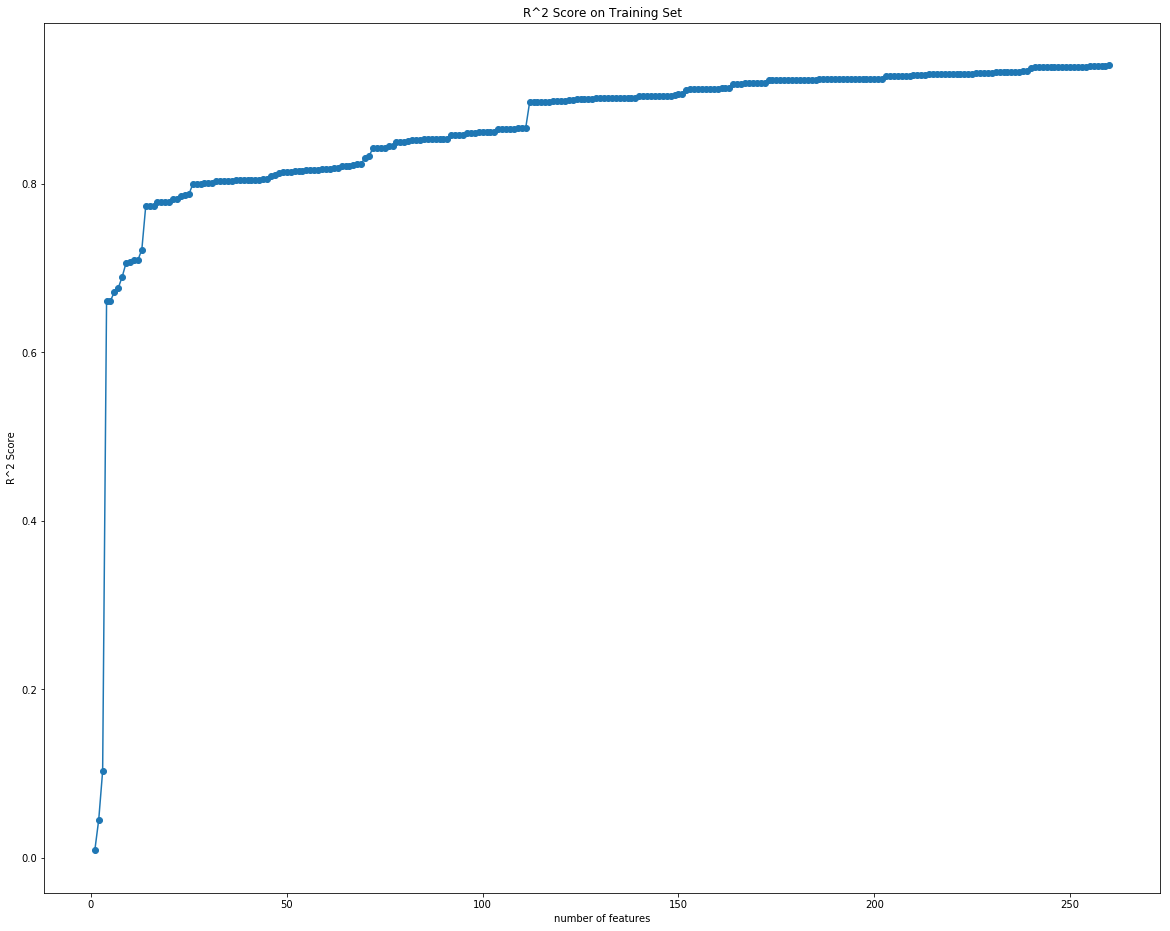

In [87]:
n = range(1, X_train.shape[1])
r2_vec_train = []
for i in n:
    ols.fit(X_train.iloc[:, 0:i] , y_train)
    r2_vec_train.append(ols.score(X_train.iloc[:, 0:i] , y_train))
plt.figure(figsize=(20,16))
plt.scatter(n, r2_vec_train)
plt.plot(n, r2_vec_train)
plt.xlabel('number of features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score on Training Set')
plt.show()

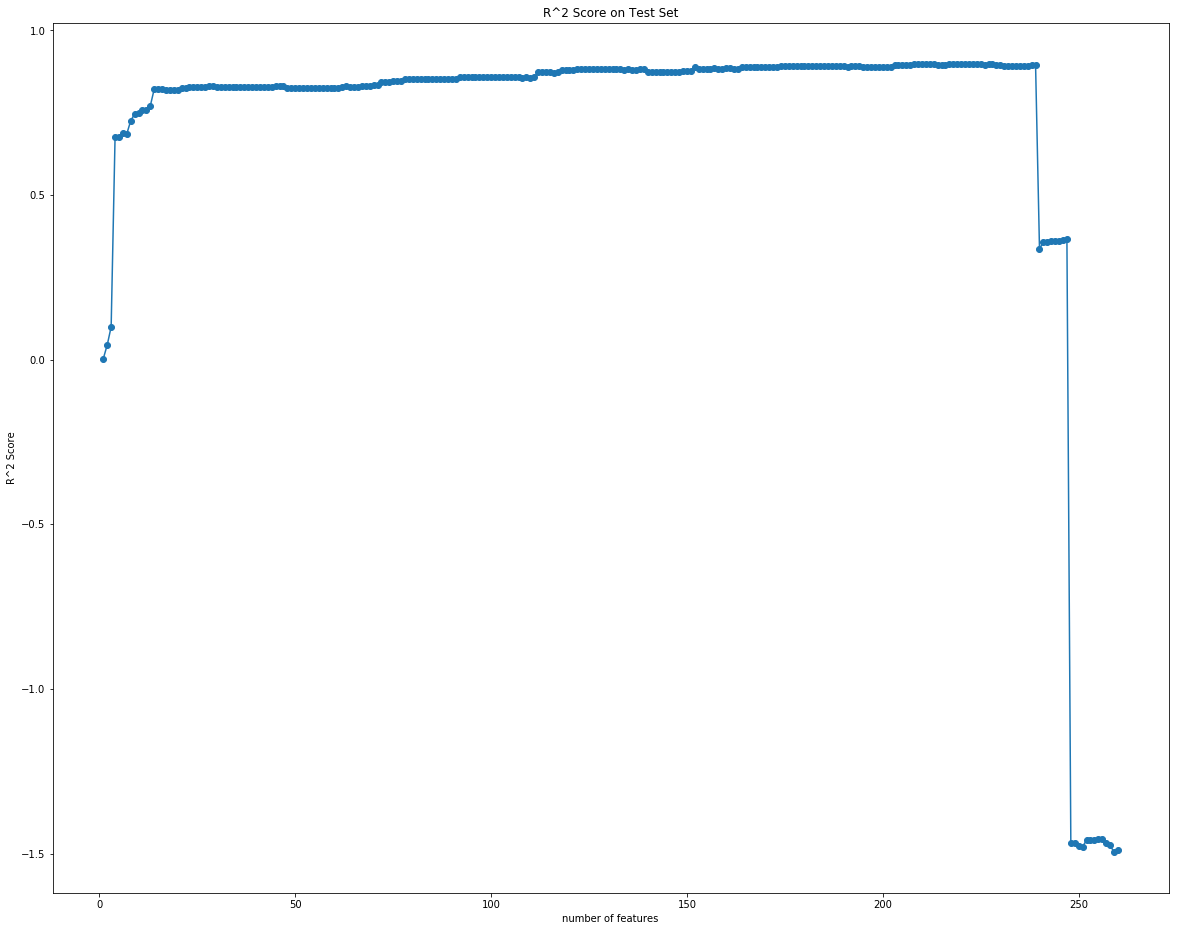

In [88]:
r2_vec_test = []
for i in n:
    ols.fit(X_train.iloc[:, 0:i] , y_train)
    r2_vec_test.append(ols.score(X_test.iloc[:, 0:i] , y_test))
plt.figure(figsize=(20,16))
plt.scatter(n, r2_vec_test)
plt.plot(n, r2_vec_test)
plt.xlabel('number of features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score on Test Set')
plt.show()

In [104]:
r2_max_test = max(r2_vec_test)
max_index = [i for i, j in enumerate(r2_vec_test) if j == r2_max_test]

In [116]:
list(enumerate(r2_vec_test))

[(0, 0.0031851852086991483),
 (1, 0.044766328488368146),
 (2, 0.0995292144442247),
 (3, 0.6765254022558815),
 (4, 0.6756844046085053),
 (5, 0.6872604403927682),
 (6, 0.6859937785044609),
 (7, 0.7258677394290531),
 (8, 0.746381319527008),
 (9, 0.7479607120862987),
 (10, 0.7584978010262123),
 (11, 0.7584978010261906),
 (12, 0.7709507706305864),
 (13, 0.8219322694861897),
 (14, 0.8213485748442754),
 (15, 0.8213485748442779),
 (16, 0.8194447245076153),
 (17, 0.8192331931497209),
 (18, 0.8188199679971433),
 (19, 0.8188392807846064),
 (20, 0.8244898858188873),
 (21, 0.8253859362371101),
 (22, 0.8281066467085195),
 (23, 0.8273232117015851),
 (24, 0.8267041979418718),
 (25, 0.8295804792025157),
 (26, 0.8293972871427548),
 (27, 0.8304528753530837),
 (28, 0.8297704446966718),
 (29, 0.8295110228743582),
 (30, 0.8287460221659437),
 (31, 0.8278646831901838),
 (32, 0.8285597386321747),
 (33, 0.8281097598883153),
 (34, 0.8280867813073227),
 (35, 0.8281875380027413),
 (36, 0.8272403963597166),
 (37, 0

In [117]:
print('The highest R^2 score is: %0.4f with 1 to %i features' % (r2_max_test, max_index[0]+1))

The highest R^2 score is: 0.8988 with 1 to 210 features


In [121]:
ols.fit(X_train.iloc[:, 0:210] , y_train)
ols.score(X_test.iloc[:, 0:210], y_test)

0.8988436342672165

In [124]:
good_features = X_train.columns[0:210]
good_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Electrical_FuseP', 'Electrical_Mix', 'KitchenQual_Ex',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'Functional_Maj1',
       'Functional_Maj2', 'Functional_Min1', 'Functional_Min2',
       'Functional_Mod'],
      dtype='object', length=210)